### Descenso de Gradiente Estocástico (SGD):

- **Descenso de Gradiente (GD)**: Esta es la forma básica de algoritmo de optimización. La idea es calcular los gradientes para todo el conjunto de datos en cada iteración y luego actualizar los pesos. Es computacionalmente costoso para grandes conjuntos de datos.

- **Descenso de Gradiente Estocástico (SGD)**: En lugar de calcular los gradientes para todo el conjunto de datos, el SGD elige aleatoriamente un punto de datos del conjunto de datos en cada iteración para calcular el gradiente y actualizar los pesos. Esto introduce ruido en el proceso de optimización, lo que puede tener el efecto beneficioso de escapar de mínimos locales, pero también puede hacer que el proceso de optimización sea más errático.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

class Xor_NN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(2, 2)  # capa de entrada: 2 neuronas, capa oculta: 2 neuronas
        self.layer2 = nn.Linear(2, 1)  # Hidden layer: 2 neurons, Output layer: 1 neuron
    
    def forward(self, x):
        x = torch.sigmoid(self.layer1(x))
        x = torch.sigmoid(self.layer2(x))
        return x


# Initialize the network, loss, and optimizer
net = Xor_NN()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.5)



### Explicación del Código:

1. **optimizer.zero_grad()**: Antes de calcular los gradientes durante la retropropagación, es esencial anular cualquier gradiente previamente calculado. Esto evita la acumulación de gradientes de iteraciones anteriores. Si no anulas los gradientes, el modelo seguirá sumando a los gradientes almacenados previamente, lo cual generalmente no es deseable.

2. **loss.backward()**: Esta línea es donde ocurre la magia de la retropropagación. Una vez que el paso hacia adelante calcula la pérdida de la red, `loss.backward()` calcula el gradiente de la pérdida con respecto a los parámetros (o pesos) del modelo usando la regla de la cadena. Estos gradientes se utilizan para actualizar los pesos de la red.

3. **optimizer.step()**: Después de calcular los gradientes en el paso hacia atrás, esta línea actualiza los pesos del modelo. La forma en que se actualizan estos pesos está determinada por el algoritmo de optimización utilizado, que en este caso es el Descenso de Gradiente Estocástico (SGD).


In [2]:

# Prepare data
X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input
Y = torch.FloatTensor([[0], [1], [1], [0]])              # Target output

# Training loop
for epoch in range(10000):
    optimizer.zero_grad()
    output = net(X)
    loss = criterion(output, Y)
    loss.backward()
    optimizer.step()
    
    if epoch % 1000 == 0:
        print(f'Epoch {epoch} Loss: {loss.item()}')

# Testing
with torch.no_grad():
    test_data = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
    test_output = net(test_data)
    print(f'Test output: {test_output}')


Epoch 0 Loss: 0.3094574213027954
Epoch 1000 Loss: 0.24992233514785767
Epoch 2000 Loss: 0.24916668236255646
Epoch 3000 Loss: 0.1948108673095703
Epoch 4000 Loss: 0.011173807084560394
Epoch 5000 Loss: 0.004030774813145399
Epoch 6000 Loss: 0.0023741782642900944
Epoch 7000 Loss: 0.0016630621394142509
Epoch 8000 Loss: 0.0012726725544780493
Epoch 9000 Loss: 0.0010274974629282951
Test output: tensor([[0.0294],
        [0.9720],
        [0.9668],
        [0.0262]])


# Tutorial 6: Building a Simple Neural Network with PyTorch
## Objective
In this tutorial, we will build a simple neural network using PyTorch to solve a real-world problem. We will focus on using just linear layers and activation functions, without any dropout or regularization techniques.
## Dataset
Vamos usar uno de los datasets más ~~viejos~~ usado de todos, Iris flower data set, caso no conozca (https://es.wikipedia.org/wiki/Conjunto_de_datos_flor_iris) la gracía es que es un dataset muy simple y conocido, iremos utilizarlo para ir construyendo nuestro modelo sin tener que estar tan pendiente de los datos.

In [3]:
from sklearn.datasets import load_iris
import torch

data = load_iris()
print(len(data['data']))
test_size = int(2* len(data['data'])/3)

train_data = data['data'][0:test_size]
train_traget = data['target'][0:test_size]


X = torch.tensor(train_data, dtype=torch.float32)
y = torch.tensor(train_traget, dtype=torch.long)


150


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 3)

    # def forward(self, x):
    #     x = F.tanh(self.fc1(x))
    #     x = F.tanh(self.fc2(x))
    #     x = self.fc3(x)
    #     return x
    
    #Sigmoide
    # def forward(self, x):
    #     x = F.sigmoid(self.fc1(x))
    #     x = F.sigmoid(self.fc2(x))
    #     x = self.fc3(x)
    #     return x

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [7]:
from torch.optim import SGD

model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=0.01)

epoch_loss = []

for epoch in range(1000):
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")
    epoch_loss.append(loss.item())
print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 1.3693209886550903
Epoch 101, Loss: 0.11115957051515579
Epoch 201, Loss: 0.03326087072491646
Epoch 301, Loss: 0.01737337000668049
Epoch 401, Loss: 0.01131724938750267
Epoch 501, Loss: 0.008259166032075882
Epoch 601, Loss: 0.006442344281822443
Epoch 701, Loss: 0.00525512034073472
Epoch 801, Loss: 0.0044226995669305325
Epoch 901, Loss: 0.0038084560073912144
Epoch 1000, Loss: 0.0033423281274735928


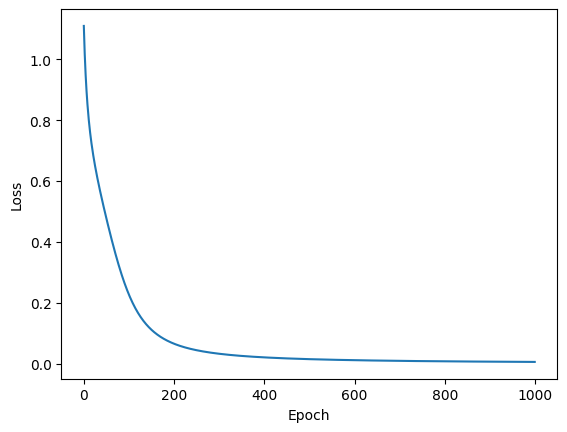

Accuracy: 100.0%
Accuracy: 0.0%


In [14]:

import matplotlib.pyplot as plt
plt.plot(epoch_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# feedforward for unseen data
test_data = data['data'][test_size:]
test_traget = data['target'][test_size:]
# eval
X_test = torch.tensor(test_data, dtype=torch.float32)
y_test = torch.tensor(test_traget, dtype=torch.long)

test_losses = []

import torch.nn.functional as F

with torch.no_grad():
    # Forward pass
    outputs = model(X)
    
    # Apply Softmax to get probabilities
    probabilities = F.softmax(outputs, dim=1)
    
    # Get the predicted class
    _, predicted_class = torch.max(probabilities, 1)

correct = (predicted_class == y).sum().item()
total = y.size(0)
accuracy = correct / total
print(f'Accuracy: {accuracy * 100}%')

# . . . . . 

with torch.no_grad():
    # Forward pass
    outputs = model(X_test)
    
    # Apply Softmax to get probabilities
    probabilities = F.softmax(outputs, dim=1)
    
    # Get the predicted class
    _, predicted_class = torch.max(probabilities, 1)

correct = (predicted_class == y_test).sum().item()
total = y_test.size(0)
accuracy = correct / total
print(f'Accuracy: {accuracy * 100}%')



